**Author**: Naomi Baes and Chat GPT

**Purpose**: This script gets corpus statistics for the raw-est version of both corpora (that are later used for preprocessing)

# Get corpus statistics

## Range: 1970 - 2016

Note: The psychology corpus has a header, whereas the general corpus does not (modify the code according to input files)

In [11]:
import os

input_files = [
    "C:/Users/naomi/OneDrive/COMP80004_PhDResearch/RESEARCH/DATA/CORPORA/COHACOCA/coha.coca.cleaned2.lc.no-numb.noacad.mental",
    "C:/Users/naomi/OneDrive/COMP80004_PhDResearch/RESEARCH/DATA/CORPORA/Psychology/abstract_year_journal.csv.mental"
]

def filter_corpus(input_file, output_file, year_range=(1970, 2019)):
    """
    Filters lines from the input file based on the year range and writes the filtered lines to the output file.

    Args:
        input_file: Path to the input corpus file.
        output_file: Path to write the filtered output.
        year_range: Tuple of integers representing the minimum and maximum year (inclusive).
    """
    with open(input_file, 'r', encoding='utf-8') as fin, open(output_file, 'w', encoding='utf-8') as fout:
        for line in fin:
            parts = line.strip().split(' ||||| ')
            if len(parts) >= 2:
                year_str = parts[1].strip()
                if year_str.isdigit():
                    year = int(year_str)
                    if year_range[0] <= year <= year_range[1]:
                        fout.write(line)


def process_corpus(file_path, year_range=(1970, 2019), skip_header=False):
    """
    Processes a corpus file, filters lines based on year range, and calculates statistics.

    Args:
        file_path: Path to the corpus file.
        year_range: Tuple of integers representing the minimum and maximum year (inclusive).
        skip_header: Whether to skip the header line in the input file (default is False).

    Returns:
        A dictionary containing corpus statistics or None if file not found.
    """

    if not os.path.exists(file_path):
        print(f"Warning: File not found - {file_path}")
        return None

    # Filter lines based on year range
    filtered_corpus_path = f"{file_path}.filtered"
    filter_corpus(file_path, filtered_corpus_path, year_range)

    # Calculate statistics
    stats = {"tokens": 0, "lines": 0, "min_year": float('inf'), "max_year": float('-inf')}
    with open(filtered_corpus_path, 'r', encoding='utf-8') as fin:
        for line in fin:
            stats["tokens"] += len(line.split())
            stats["lines"] += 1
            parts = line.strip().split(' ||||| ')
            if len(parts) >= 2:
                year = int(parts[1])
                stats["min_year"] = min(stats["min_year"], year)
                stats["max_year"] = max(stats["max_year"], year)

    # Remove the filtered corpus file
    os.remove(filtered_corpus_path)

    return stats

def main():

    # Define year range
    year_range = (1970, 2019)

    # Process each corpus and store results
    corpus_stats = []
    for file_path in input_files:
        stats = process_corpus(file_path, year_range)  # Removed skip_header argument
        if stats:
            # Extract specific values
            tokens = stats["tokens"]
            lines = stats["lines"]
            min_year = stats["min_year"]
            max_year = stats["max_year"]
            corpus_name = os.path.basename(file_path)  # Get the name of the corpus

            # Print corpus statistics
            print(f"Corpus: {corpus_name}")
            print(f"  Tokens: {tokens}")
            print(f"  Lines: {lines}")
            print(f"  Min Year: {min_year}")
            print(f"  Max Year: {max_year}\n")

            # Append the stats to corpus_stats
            corpus_stats.append(stats)

    # Print or save corpus statistics (modify as needed)
    # Ensure the output folder exists
    os.makedirs("output", exist_ok=True)  # Create the "output" folder if it doesn't exist

    with open(os.path.join("output", "corpus_stats.txt"), "w") as f:  # Use 'w' mode to overwrite the file
        for corpus_stat in corpus_stats:
            # Extract specific values (modify as needed)
            tokens = corpus_stat["tokens"]
            lines = corpus_stat["lines"]
            min_year = corpus_stat["min_year"]
            max_year = corpus_stat["max_year"]

            # Write extracted values to the file
            f.write(f"Corpus statistics:  {corpus_name}\n  Tokens: {tokens}\n  Lines: {lines}\n  Min Year: {min_year}\n  Max Year: {max_year}\n\n")

    print(f"Corpus statistics written to {os.path.join('output', 'corpus_stats.txt')}")

if __name__ == "__main__":
    main()

Corpus: coha.coca.cleaned2.lc.no-numb.noacad.mental
  Tokens: 540853009
  Lines: 272122
  Min Year: 1970
  Max Year: 2019

Corpus: abstract_year_journal.csv.mental
  Tokens: 142093681
  Lines: 859704
  Min Year: 1970
  Max Year: 2019

Corpus statistics written to output\corpus_stats.txt


## Range: Min year - Max year

Note: The psychology corpus has a header, whereas the general corpus does not (modify the code according to input files)

In [12]:
import os


def process_corpus(file_path, skip_header=False):
    """
    Processes a corpus file, filters lines based on year range, and calculates statistics.

    Args:
        file_path: Path to the corpus file.
        skip_header: Whether to skip the header line in the input file (default is False).

    Returns:
        A dictionary containing corpus statistics or None if file not found.
    """

    if not os.path.exists(file_path):
        print(f"Warning: File not found - {file_path}")
        return None

    # Initialize statistics
    stats = {"tokens": 0, "lines": 0, "min_year": float('inf'), "max_year": float('-inf')}

    with open(file_path, 'r', encoding='utf-8') as fin:
        if skip_header:
            next(fin)  # Skip the header line (if applicable)

        for line in fin:
            parts = line.strip().split(' ||||| ')
            if len(parts) >= 4:  # Check if there are at least 4 columns
                year_str = parts[1]
                if year_str.isdigit():
                    year = int(year_str)
                    # Update statistics
                    stats["tokens"] += len(parts[0].split())  # Assuming the tokens are in the first column
                    stats["lines"] += 1
                    stats["min_year"] = min(stats["min_year"], year)
                    stats["max_year"] = max(stats["max_year"], year)

    return stats

def main():
    # Your input files
    input_files = [
        "C:/Users/naomi/OneDrive/COMP80004_PhDResearch/RESEARCH/DATA/CORPORA/COHACOCA/coha.coca.cleaned2.lc.no-numb.noacad.mental",
        "C:/Users/naomi/OneDrive/COMP80004_PhDResearch/RESEARCH/DATA/CORPORA/Psychology/abstract_year_journal.csv.mental"
    ]

    # Process each corpus and store results
    corpus_stats = []
    for file_path in input_files:
        stats = process_corpus(file_path, skip_header=True if "Psychology" in file_path else False)
        if stats:
            corpus_stats.append(stats)
            print(f"Corpus: {os.path.basename(file_path)}")
            print(f"  Tokens: {stats['tokens']}")
            print(f"  Lines: {stats['lines']}")
            print(f"  Min Year: {stats['min_year']}")
            print(f"  Max Year: {stats['max_year']}\n")

    # Print or save corpus statistics (modify as needed)
    os.makedirs("output", exist_ok=True)  # Create the "output" folder if it doesn't exist

    with open(os.path.join("output", "corpus_stats.all.txt"), "w") as f:
        for stats in corpus_stats:
            f.write(f"Tokens: {stats['tokens']}\n")
            f.write(f"Lines: {stats['lines']}\n")
            f.write(f"Min Year: {stats['min_year']}\n")
            f.write(f"Max Year: {stats['max_year']}\n\n")

    print(f"Corpus statistics written to {os.path.join('output', 'corpus_stats.all.txt')}")

if __name__ == "__main__":
    main()


Corpus: coha.coca.cleaned2.lc.no-numb.noacad.mental
  Tokens: 820542842
  Lines: 344634
  Min Year: 1810
  Max Year: 2019

Corpus: abstract_year_journal.csv.mental
  Tokens: 133017962
  Lines: 871337
  Min Year: 1930
  Max Year: 2019

Corpus statistics written to output\corpus_stats.all.txt


# Plot corpus lines for each year for each corpus

File: C:/Users/naomi/OneDrive/COMP80004_PhDResearch/RESEARCH/DATA/CORPORA/COHACOCA/coha.coca.cleaned2.lc.no-numb.noacad.mental, Counts: {1949: 1095, 2004: 10139, 1967: 1031, 1997: 7962, 1964: 1080, 1956: 1220, 1992: 7009, 1999: 8557, 1947: 1180, 1910: 329, 2003: 10373, 2005: 9439, 2002: 9690, 1952: 1193, 1970: 1062, 1976: 838, 2007: 9149, 1966: 1095, 1998: 8272, 1982: 1083, 1915: 350, 1951: 1304, 1988: 1120, 1900: 261, 1926: 788, 1996: 7308, 1832: 79, 1871: 149, 1957: 1174, 1919: 254, 1991: 6333, 1940: 1082, 1937: 1373, 1901: 230, 1994: 7471, 1984: 1020, 1969: 980, 1972: 1056, 1963: 1077, 1887: 257, 2000: 9982, 1980: 1163, 1955: 1089, 1960: 939, 1925: 1239, 1908: 356, 1869: 106, 1941: 1201, 1989: 1032, 1968: 959, 1885: 278, 1946: 1173, 1958: 1146, 1942: 1227, 1932: 931, 1912: 318, 1973: 901, 2008: 7426, 1927: 1152, 1993: 7324, 1880: 273, 1978: 863, 1962: 973, 1888: 218, 2009: 8043, 1938: 1417, 1944: 1067, 1995: 7638, 1943: 1065, 1928: 2876, 1939: 1536, 1884: 327, 1959: 1162, 1983: 1102

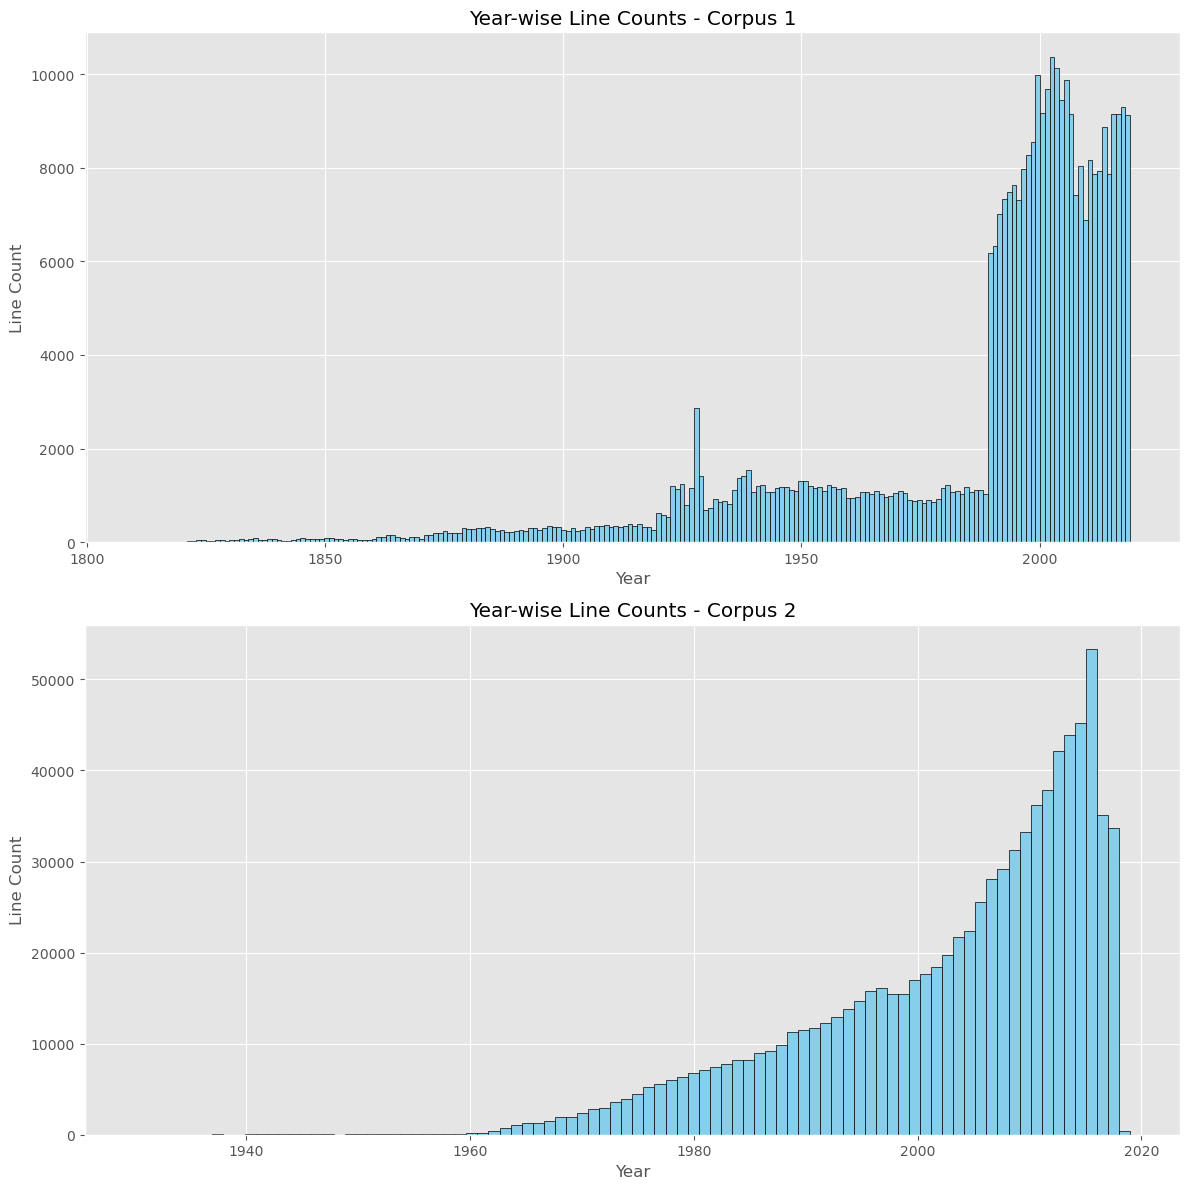

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_counts(file_path, delimiter="IIIII", skip_header=False):
    """
    Extracts year-wise line counts from a file.

    Args:
        file_path (str): Path to the file containing lines with year information.
        delimiter (str): Delimiter separating year information (default is "IIIII").
        skip_header (bool): Whether to skip the header line in the input file (default is False).

    Returns:
        dict: A dictionary mapping years (integers) to their corresponding line counts (integers).
    """
    counts_dict = {}
    try:
        with open(file_path, "r", encoding="utf-8") as file:
            if skip_header:
                next(file)  # Skip the header line (if applicable)

            for line in file:
                parts = line.strip().split(delimiter)

                # Check if there are at least two elements after splitting
                if len(parts) >= 2:
                    # Extract the year from the second column
                    year_str = parts[1].strip()
                    # Check if the year is a valid digit within the specified range
                    if year_str.isdigit():
                        # Increment the count for the corresponding year
                        year = int(year_str)
                        counts_dict[year] = counts_dict.get(year, 0) + 1

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

    return counts_dict

def process_files(input_files):
    """
    Process each file and store year-wise counts.

    Args:
        input_files (dict): A dictionary mapping corpus names to their corresponding file paths.
    Returns:
        list: A list of dictionaries, each containing year-wise counts for a corpus.
    """
    corpus_counts = []
    for corpus, file_path in input_files.items():
        # Extract counts and append to corpus_counts
        corpus_counts.append(extract_counts(file_path, delimiter="|||||", skip_header="COHACOCA" in corpus))
        print(f"File: {file_path}, Counts: {corpus_counts[-1]}")
    return corpus_counts

def generate_plots(corpus_counts):
    """
    Generate histograms of year-wise line counts.

    Args:
        corpus_counts (list): A list of dictionaries, each containing year-wise counts for a corpus.
    """
    if not any(corpus_counts):
        print("No data found in the provided files. Cannot generate plots.")
        return

    plt.style.use('ggplot')
    fig, axs = plt.subplots(len(corpus_counts), figsize=(12, 6 * len(corpus_counts)))  # Create subplots for each corpus
    
    for i, corpus_count in enumerate(corpus_counts):
        years = list(corpus_count.keys())
        counts = list(corpus_count.values())

        # Dynamically adjust the plotting range based on min and max years
        min_year = min(years)
        max_year = max(years)

        axs[i].hist(years, bins=max_year - min_year + 1, weights=counts, range=(min_year, max_year), color='skyblue', edgecolor='black')
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel('Line Count')
        axs[i].set_title(f'Year-wise Line Counts - Corpus {i+1}')

    plt.tight_layout()
    plt.show()


def main():
    # Your input files
    input_files = {
        'cohacoca': "C:/Users/naomi/OneDrive/COMP80004_PhDResearch/RESEARCH/DATA/CORPORA/COHACOCA/coha.coca.cleaned2.lc.no-numb.noacad.mental",
        'psych': "C:/Users/naomi/OneDrive/COMP80004_PhDResearch/RESEARCH/DATA/CORPORA/Psychology/abstract_year_journal.csv.mental"
    }

    corpus_counts = process_files(input_files)
    generate_plots(corpus_counts)

if __name__ == "__main__":
    main()
